**Importamos Librerías e importación de Datos**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_train = pd.read_csv('metadata_casas_train.csv')
data_test = pd.read_csv('metadata_casas_test.csv')

print(data_train)
print(data_test)

     Unnamed: 0         cod_casa  habitaciones  banos  area  zipcode  precio
0             0  OC4U9J6C11R5715             4    4.0  4053    85255  869500
1             1  CQF44W2LE3S3NSC             4    3.0  3343    36372  865200
2             2  LT2Z9MOPF5KIM7T             3    4.0  3923    85266  889000
3             3  VUCNPXL2QMIA22A             5    5.0  4022    85262  910000
4             4  9CWP6T0SBBLGDBL             3    4.0  4116    85266  971226
..          ...              ...           ...    ...   ...      ...     ...
438         528  WBHW5AM63U8KZ0J             4    3.0  2506    94531  449950
439         529  IEQO5KRHCSPN7C4             4    2.5  2236    94531  495000
440         530  Y690NX165ESH8MZ             5    2.0  2066    94531  399900
441         531  4MYB1A4FTM1NB2C             4    3.5  9536    94531  460000
442         533  MFROTT3IVB78DFG             4    3.0  2312    94531  419000

[443 rows x 7 columns]
     Unnamed: 0         cod_casa  habitaciones  bano

**Limpieza de datos**

In [3]:
## Limpiar Datos
new_data_train = data_train.dropna() ## Eliminar filas con valores nulos.

print(new_data_train.describe())
print("########################################################################################")
print(new_data_train.head())
print("########################################################################################")
print(new_data_train.tail())

       Unnamed: 0  habitaciones       banos         area       zipcode  \
count  443.000000    443.000000  443.000000   443.000000    443.000000   
mean   268.099323      3.358916    2.660835  2346.255079  90786.645598   
std    153.815174      1.182386    0.999268  1241.917375   7459.104896   
min      0.000000      1.000000    1.000000   701.000000  36372.000000   
25%    138.500000      2.000000    2.000000  1433.000000  92276.000000   
50%    270.000000      3.000000    2.500000  2024.000000  92880.000000   
75%    396.500000      4.000000    3.000000  3057.000000  93510.000000   
max    533.000000     10.000000    7.000000  9583.000000  98021.000000   

             precio  
count  4.430000e+02  
mean   5.798091e+05  
std    5.298119e+05  
min    2.200000e+04  
25%    2.270000e+05  
50%    5.200000e+05  
75%    7.001000e+05  
max    5.858000e+06  
########################################################################################
   Unnamed: 0         cod_casa  habitaciones  

**Normalización**

In [4]:
def normalized(data, test):
    for i in data.columns:
        if data[i].max() > test[i].max():
            data[i] = data[i]/data[i].max()
            #test[i] = test[i]/data[i].max()
        else:
            data[i] = data[i]/test[i].max()
            #test[i] = test[i]/test[i].max()
    for i in data.columns:
        if data[i].max() > test[i].max():
            #data[i] = data[i]/data[i].max()
            test[i] = test[i]/data[i].max()
        else:
            #data[i] = data[i]/test[i].max()
            test[i] = test[i]/test[i].max()
    return data, test

In [5]:
# Normalizamos con el promedio para obtener valores mayores a 1 y detectar outliers con Huber function
max_precio = new_data_train.loc[:,["precio"]].max(axis=0)
new_data_train["precio"] = new_data_train.loc[:,["precio"]]/max_precio

print(max_precio)
all_data_train = new_data_train.loc[:, ["habitaciones","banos","area","precio"]]
print(all_data_train)

precio    5858000
dtype: int64
     habitaciones  banos  area    precio
0               4    4.0  4053  0.148429
1               4    3.0  3343  0.147695
2               3    4.0  3923  0.151758
3               5    5.0  4022  0.155343
4               3    4.0  4116  0.165795
..            ...    ...   ...       ...
438             4    3.0  2506  0.076809
439             4    2.5  2236  0.084500
440             5    2.0  2066  0.068266
441             4    3.5  9536  0.078525
442             4    3.0  2312  0.071526

[443 rows x 4 columns]


**Exploración de datos**

<Axes: >

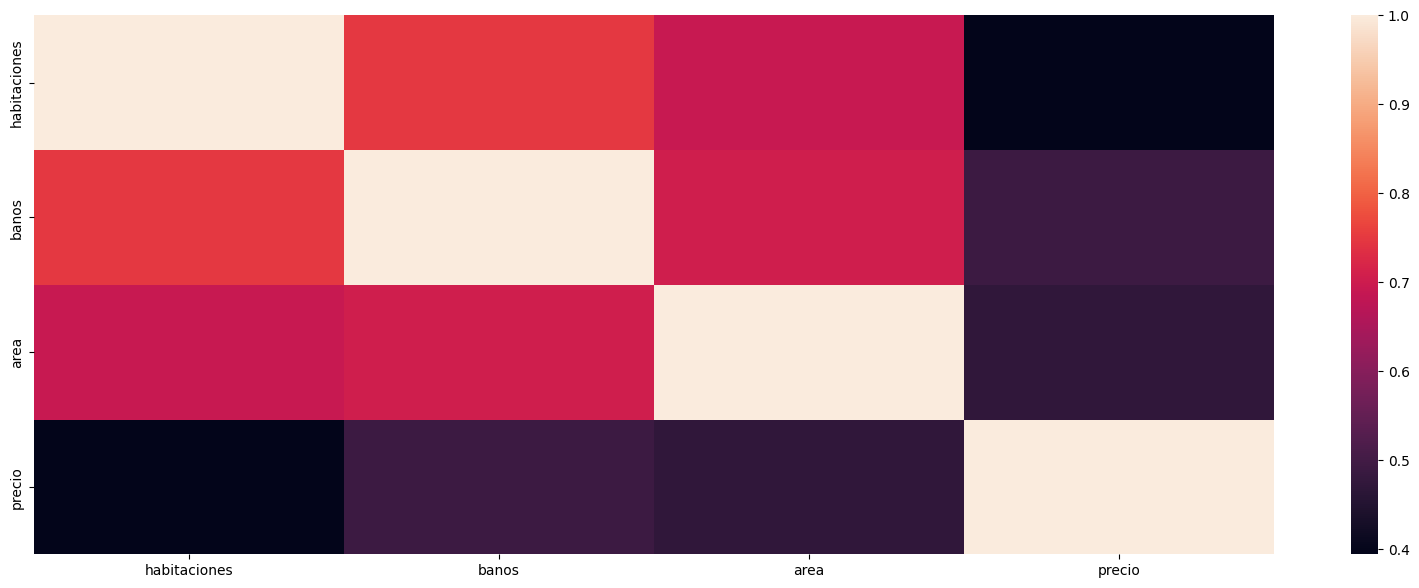

In [6]:
corr = all_data_train.corr()

fig, axs = plt.subplots(ncols=1, figsize=(20, 7))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=axs)

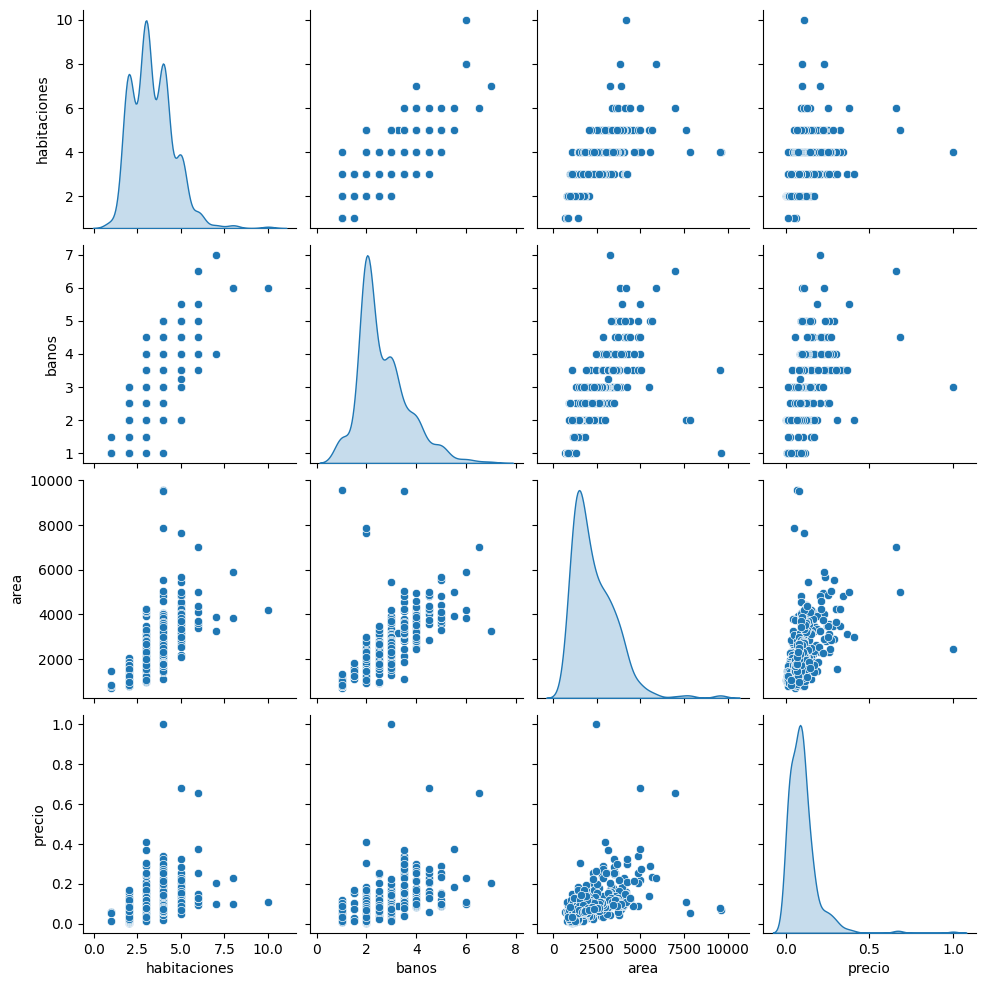

In [7]:
sns.pairplot(all_data_train, diag_kind="kde")

**Creación del modelo**

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

precio = new_data_train.loc[:, ["precio"]]
new_data_test = data_test.loc[:, ["habitaciones", "banos", "area"]]
norm_data_train, norm_data_test = normalized(all_data_train.loc[:, ["habitaciones","banos","area"]], new_data_test)
print(norm_data_train, norm_data_test, precio)

     habitaciones     banos      area
0             0.4  0.571429  0.422936
1             0.4  0.428571  0.348847
2             0.3  0.571429  0.409371
3             0.5  0.714286  0.419702
4             0.3  0.571429  0.429511
..            ...       ...       ...
438           0.4  0.428571  0.261505
439           0.4  0.357143  0.233330
440           0.5  0.285714  0.215590
441           0.4  0.500000  0.995095
442           0.4  0.428571  0.241261

[443 rows x 3 columns]      habitaciones     banos      area
0             0.4  0.571429  0.422936
1             0.4  0.428571  0.348847
2             0.3  0.571429  0.409371
3             0.5  0.714286  0.419702
4             0.3  0.571429  0.429511
..            ...       ...       ...
438           0.4  0.428571  0.261505
439           0.4  0.357143  0.233330
440           0.5  0.285714  0.215590
441           0.4  0.500000  0.995095
442           0.4  0.428571  0.241261

[443 rows x 3 columns]        precio
0    0.148429
1    0.14769

In [9]:
def weight_init_normal(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        m.weight.data.normal_(-0.5, 0.5)
        m.bias.data.fill_(0.)

net = torch.nn.Sequential(
        torch.nn.Linear(3, 9),
        torch.nn.Linear(9, 9),
        torch.nn.Linear(9, 9),
        torch.nn.Linear(9, 1),)

net.apply(weight_init_normal)

new_data = torch.Tensor(np.array(norm_data_train).reshape(-1, 3))
new_precio = torch.Tensor(np.array(precio).reshape(-1, 1))

# Define loss function
criterion = nn.SmoothL1Loss(reduction='mean', beta=0.01)  # Huber

# Define optimizer
optimizer = optim.SGD(net.parameters(), lr=0.000126, momentum=0.9)  # SGD

torch.autograd.set_detect_anomaly(True)

**Entrenamiento**

In [10]:
# Training
min_loss = 0.03

odd = new_data.size()[0] % 2
batch_size = int(new_data.size()[0]/2) + odd
loss_array = []

for epoch in range(1000):
    # X is a torch Variable
    permutation = torch.randperm(new_data.size()[0])

    for i in range(0, new_data.size()[0], batch_size):
        optimizer.zero_grad() # Clear the gradient buffer
        new_batch_size = batch_size

        if new_data.size()[0] - i < batch_size:
            new_batch_size += new_data.size()[0] - i

        indices = permutation[i:i+new_batch_size]
        batch_x, batch_y = new_data[indices], new_precio[indices]

        # in case you wanted a semi-full example
        out = net(batch_x)
        loss = criterion(out, batch_y)
        loss_array.append(loss.detach().numpy().item(0))

        loss.backward()
        optimizer.step()  # Update
    if min_loss > loss.detach().numpy().item(0) and epoch > 300:
        if min_loss - loss.detach().numpy().item(0) > min_loss/10:
            min_loss = loss.detach().numpy().item(0)
        else:
            print(loss)
            break

out = net(new_data)

print(loss, min_loss, epoch)

tensor(0.0357, grad_fn=<SmoothL1LossBackward0>) 0.03 999


**Evaluación**

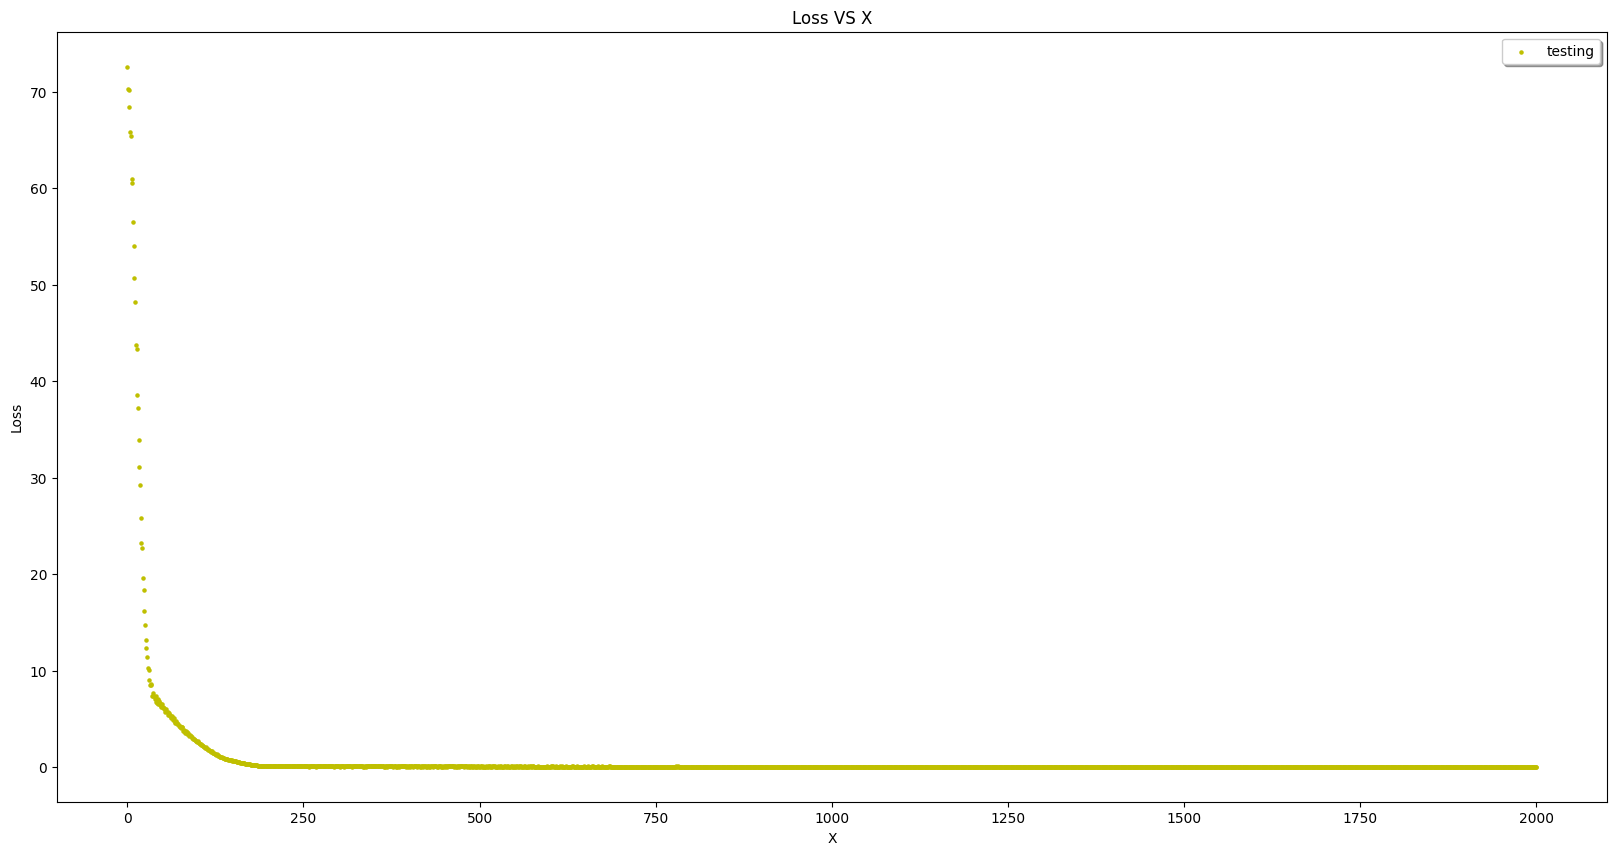

In [11]:
x_loss = np.linspace(0, len(loss_array), len(loss_array))

fig, ax = plt.subplots(ncols = 1, figsize = (20, 10))
ax.scatter(x_loss, loss_array, c = 'y', s = 5, label = 'testing')
ax.set_title("Loss VS X")
ax.set_xlabel("X")
ax.set_ylabel("Loss")
ax.legend(frameon=True, shadow=True);

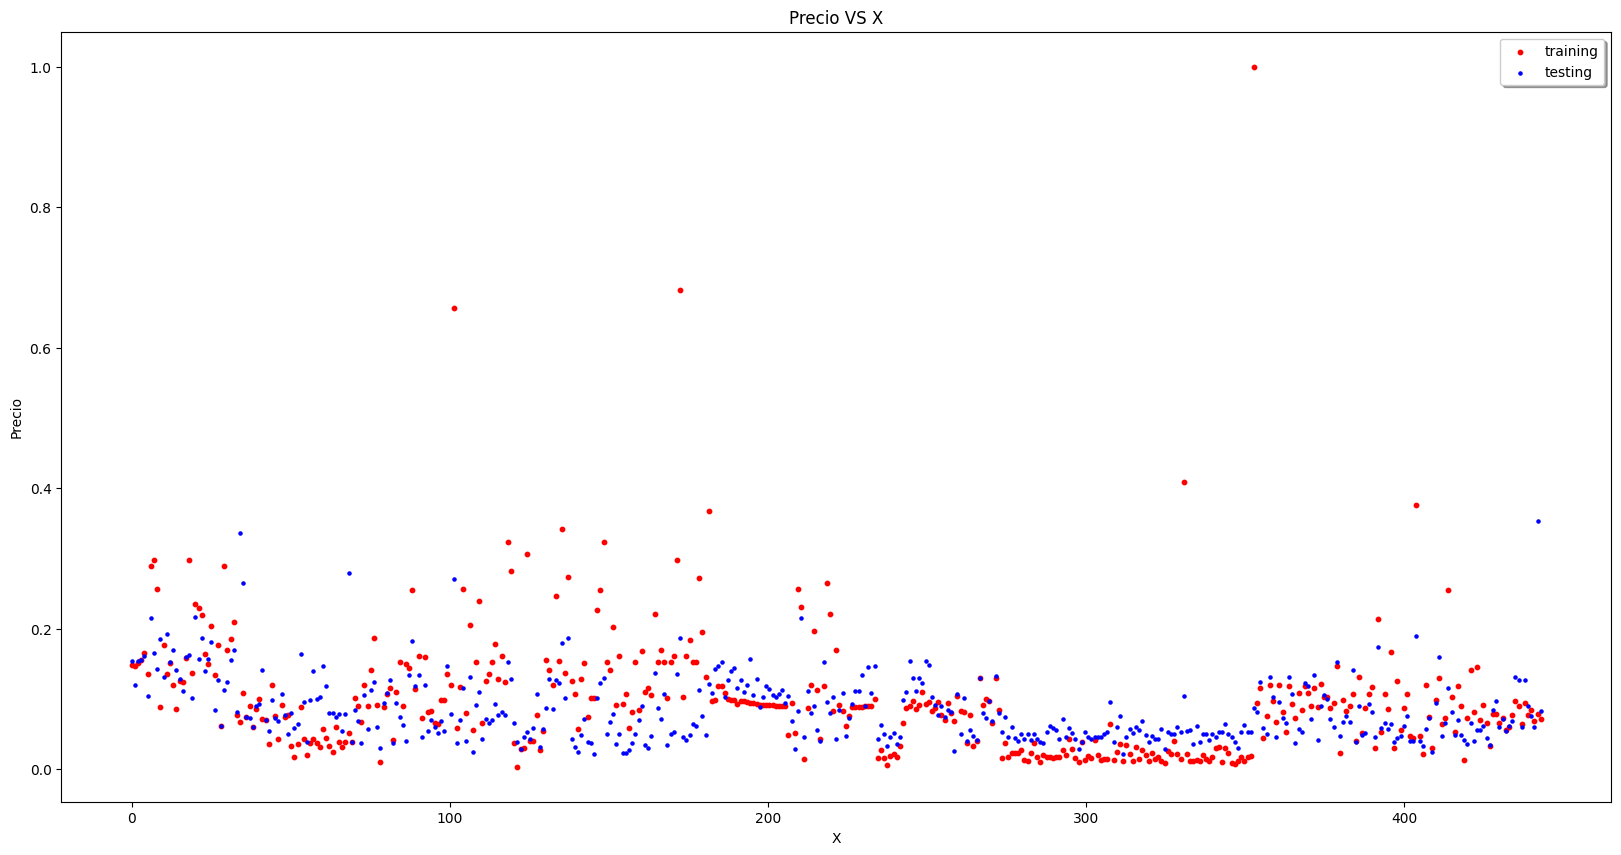

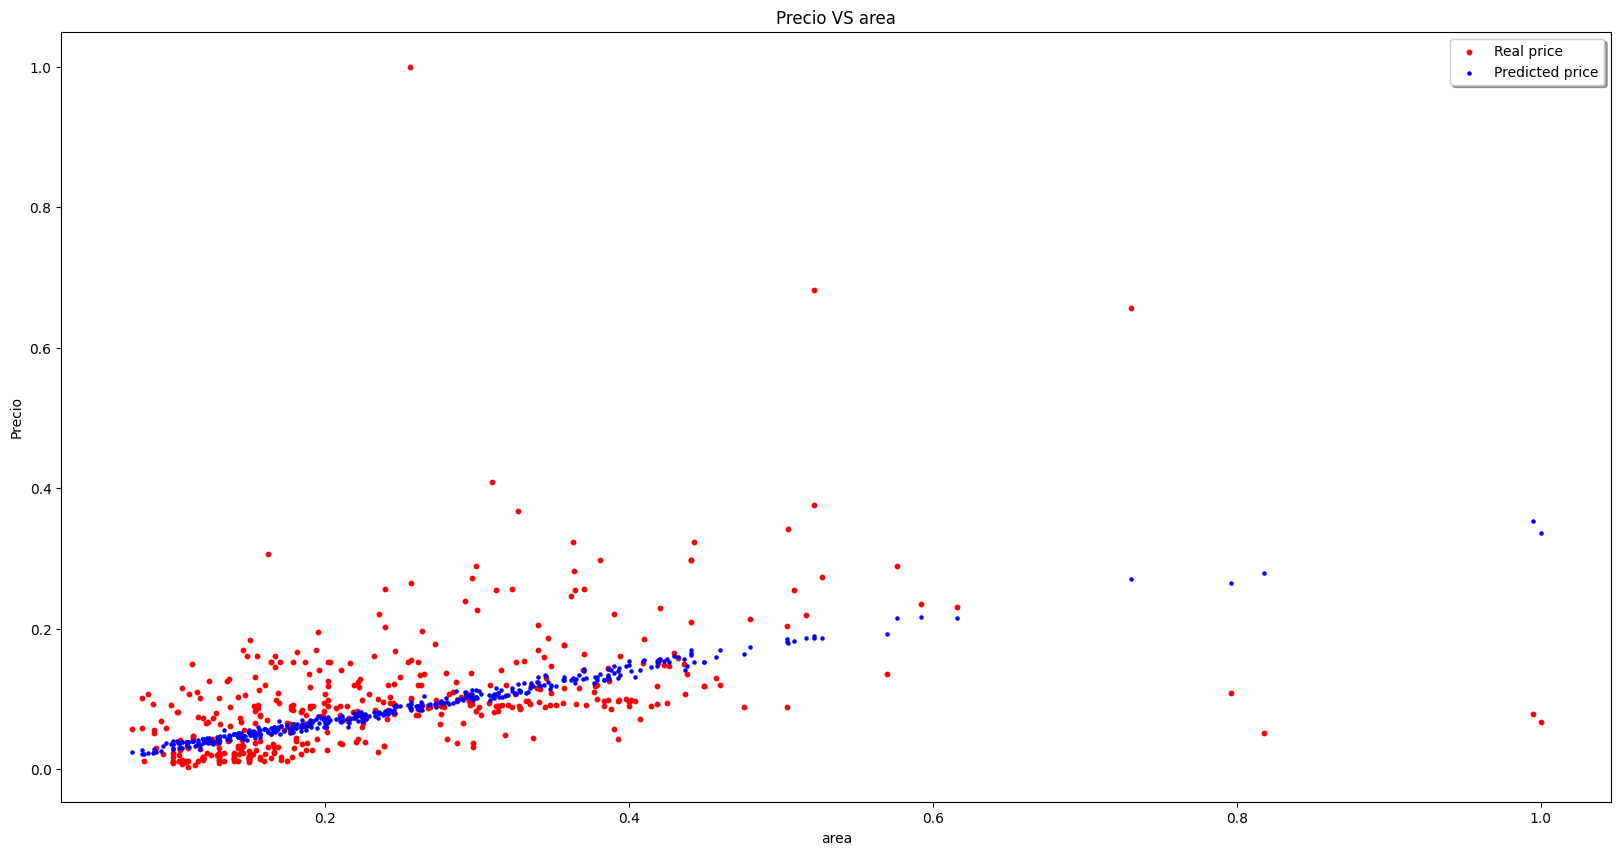

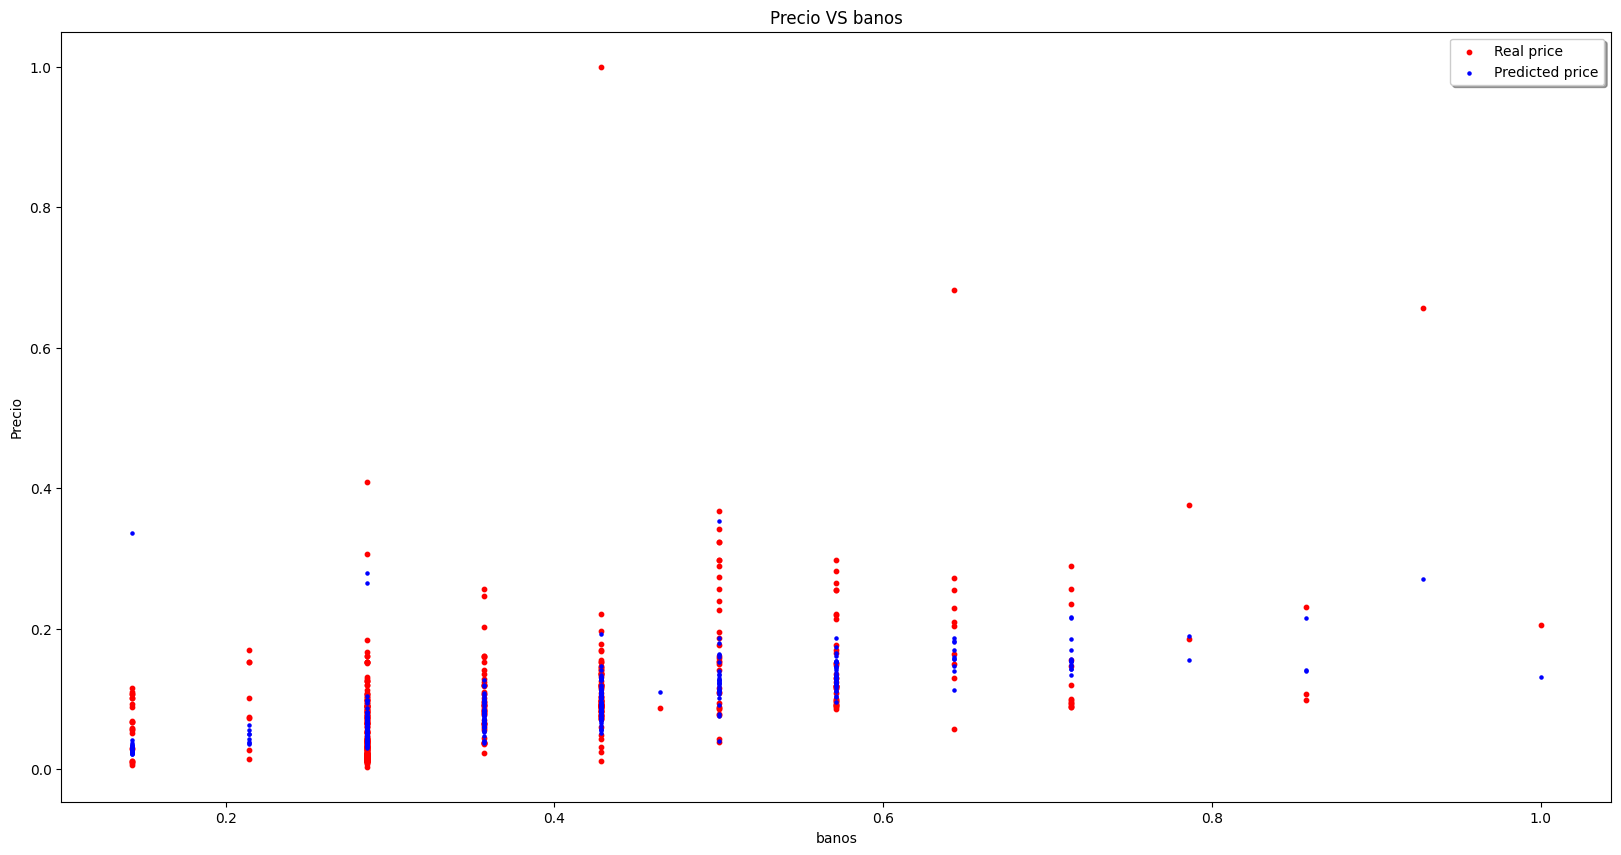

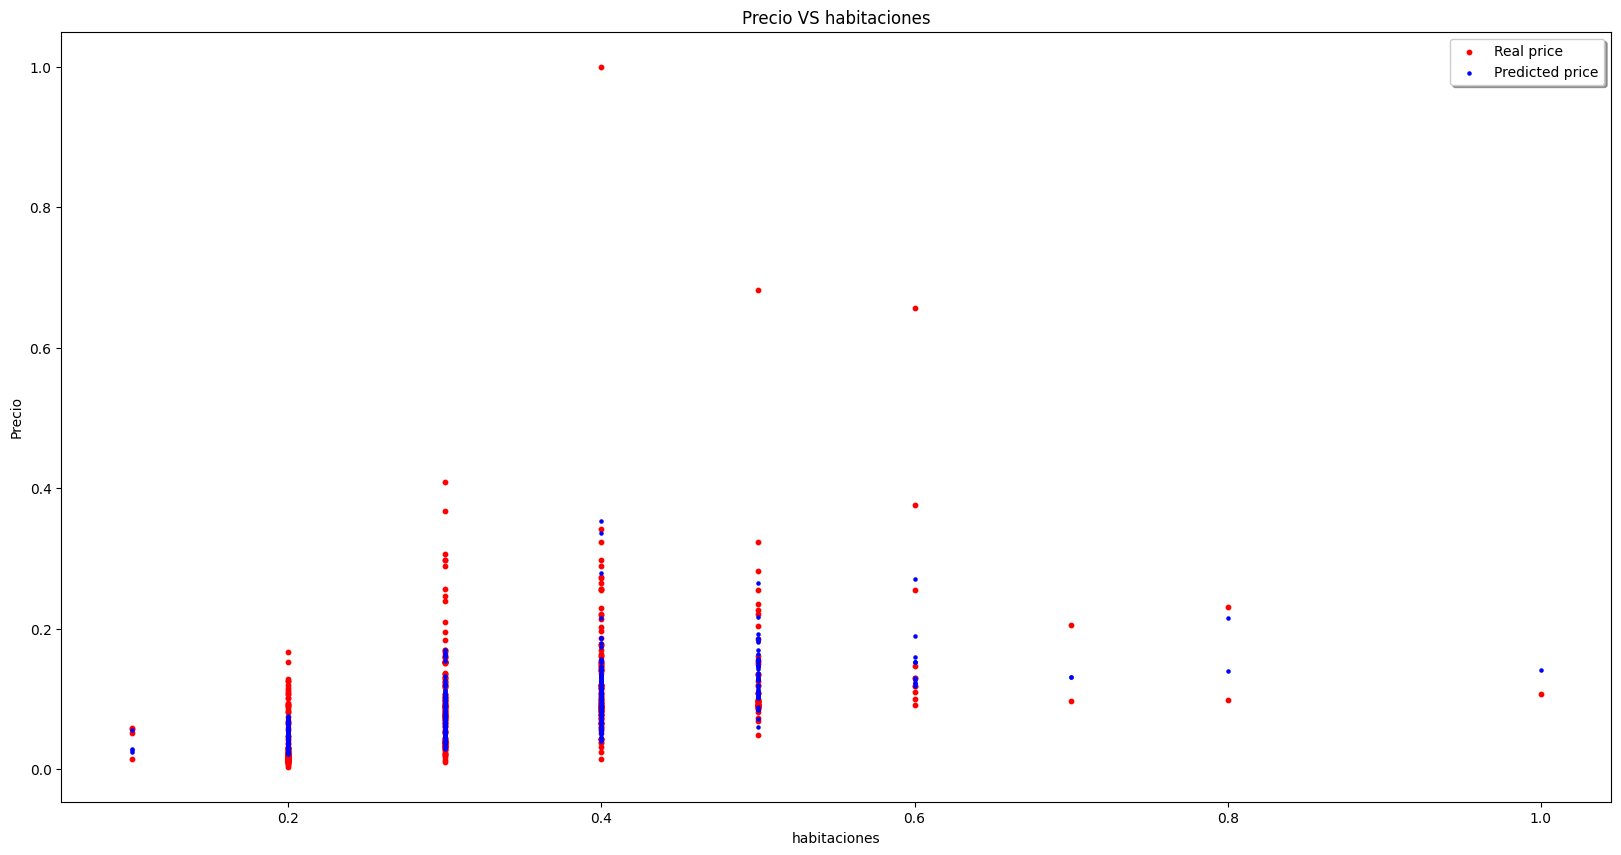

In [12]:
labels = ["area", "banos", "habitaciones"]

def plotData(data, out_data, real_output, labels):
  x = np.linspace(0, real_output.size(0), real_output.size(0))

  fig, ax = plt.subplots(ncols = 1, figsize = (20, 10))
  ax.scatter(x, real_output, c = 'r', s = 10, label = 'training')
  ax.scatter(x, out_data.detach().numpy(), c = 'b', s = 5, label = 'testing')
  ax.set_title("Precio VS X")
  ax.set_xlabel("X")
  ax.set_ylabel("Precio")
  ax.legend(frameon=True, shadow=True);

  for i in range(data.shape[1]):
    fig, ax = plt.subplots(ncols = 1, figsize = (20, 10))
    ax.scatter(data[labels[i]], real_output, c = 'r', s = 10, label = 'Real price')
    ax.scatter(data[labels[i]], out_data.detach().numpy(), c = 'b', s = 5, label = 'Predicted price')
    ax.set_title("Precio VS " + labels[i])
    ax.set_xlabel(labels[i])
    ax.set_ylabel("Precio")
    ax.legend(frameon=True, shadow=True);
plotData(norm_data_train, out, new_precio, labels)

In [13]:
d_test = torch.Tensor(np.array(norm_data_test).reshape(-1, 3))
test = net(d_test)
print(test)

tensor([[0.1542],
        [0.1206],
        [0.1549],
        [0.1551],
        [0.1620],
        [0.1040],
        [0.2160],
        [0.1662],
        [0.1431],
        [0.1849],
        [0.1312],
        [0.1933],
        [0.1531],
        [0.1692],
        [0.1420],
        [0.1286],
        [0.1115],
        [0.1593],
        [0.1625],
        [0.1017],
        [0.2162],
        [0.1572],
        [0.1875],
        [0.1394],
        [0.1572],
        [0.1811],
        [0.0847],
        [0.1274],
        [0.0617],
        [0.1124],
        [0.1250],
        [0.1555],
        [0.1699],
        [0.0818],
        [0.3361],
        [0.2658],
        [0.0746],
        [0.0732],
        [0.0608],
        [0.0896],
        [0.0935],
        [0.1413],
        [0.0702],
        [0.0540],
        [0.0988],
        [0.0725],
        [0.0682],
        [0.1073],
        [0.0774],
        [0.0508],
        [0.0796],
        [0.0582],
        [0.0644],
        [0.1637],
        [0.0963],
        [0

0      0.154235
1      0.120557
2      0.154912
3      0.155069
4      0.162040
         ...   
438    0.089648
439    0.075948
440    0.060462
441    0.352984
442    0.082484
Name: 'value', Length: 443, dtype: float32


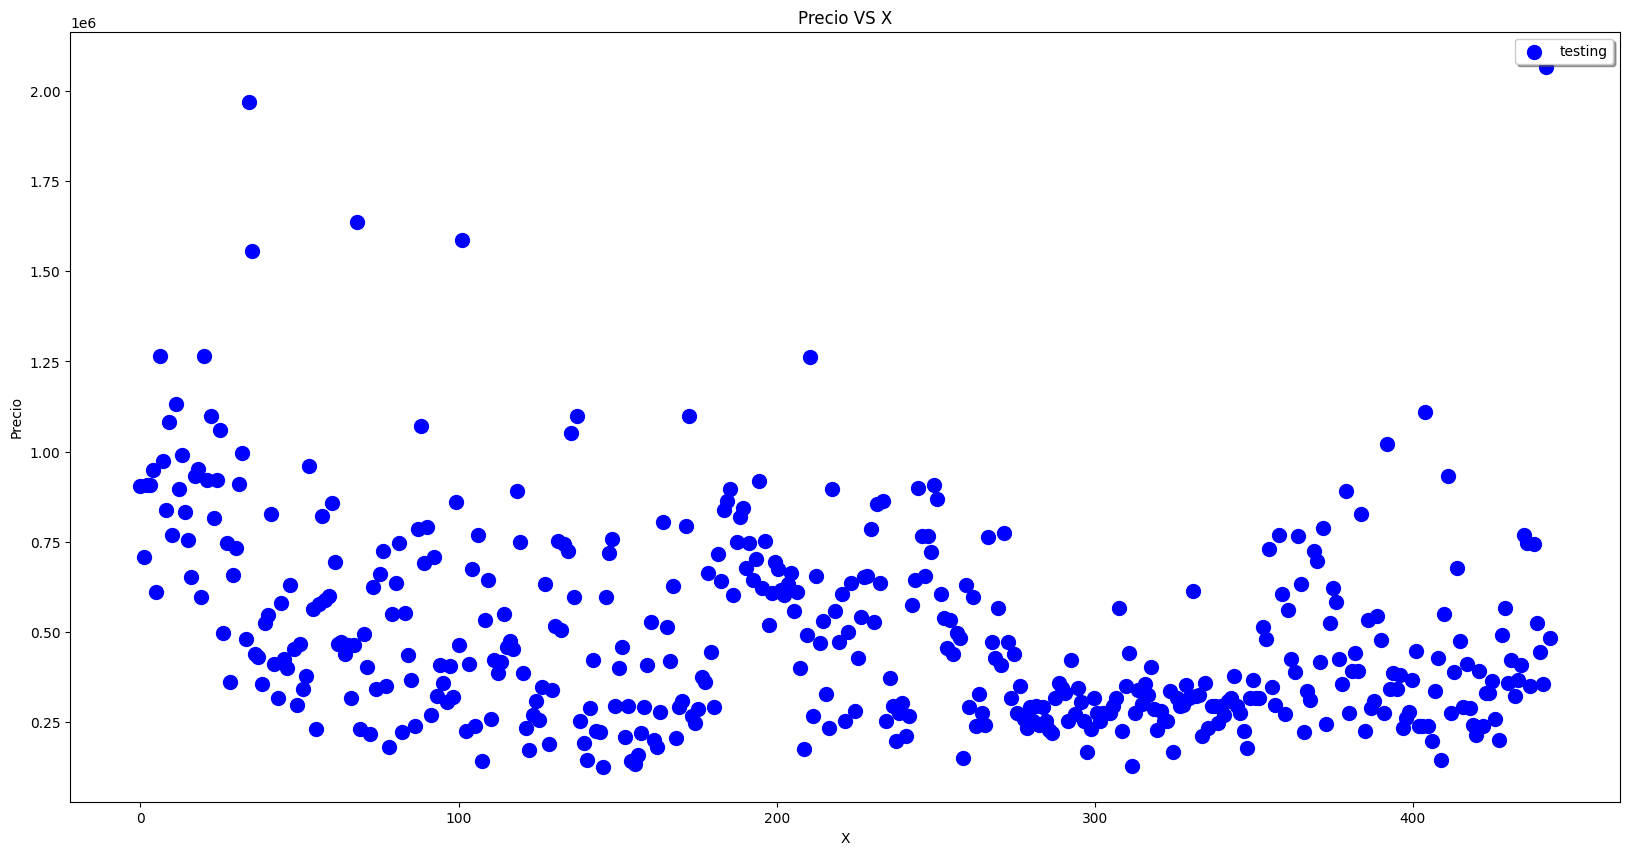

In [14]:
test_data = pd.DataFrame(test.detach().numpy(), columns = ["'value'"])
test_data["'id'"] = data_test.iloc[:,0].astype(str)
print(test_data.iloc[:,0])
for i in range(data_test.shape[0]):
    test_data.iloc[i,1] = "'%s'" % test_data.iloc[i,1]
    test_data.iloc[i,0] = test_data.iloc[i,0]*max_precio
x = np.linspace(0, len(data_test), len(data_test))
fig, ax = plt.subplots(ncols = 1, figsize = (20, 10))
ax.scatter(x, test_data["'value'"], c = 'b', s = 100, label = 'testing')
ax.set_title("Precio VS X")
ax.set_xlabel("X")
ax.set_ylabel("Precio")
ax.legend(frameon=True, shadow=True);

In [15]:
test_data.to_csv('test_output.csv', index=False)
print(test_data)

          'value'   'id'
0    9.035080e+05    '0'
1    7.062247e+05    '1'
2    9.074773e+05    '2'
3    9.083963e+05    '3'
4    9.492317e+05    '4'
..            ...    ...
438  5.251594e+05  '528'
439  4.449061e+05  '529'
440  3.541891e+05  '530'
441  2.067780e+06  '531'
442  4.831941e+05  '533'

[443 rows x 2 columns]
